In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

In [2]:
data=pd.read_csv(r"C:\Users\TNF\Desktop\thesis\network-intrusion-detection-system-project\Train_data.csv")

In [3]:
data.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [4]:
data['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [5]:
label_encoder=preprocessing.LabelEncoder()
data['protocol_type']= label_encoder.fit_transform(data['protocol_type'])
data['protocol_type'].unique()

array([1, 2, 0])

In [6]:
data['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001'], dtype=object)

In [7]:
label_encoder=preprocessing.LabelEncoder()
data['service']= label_encoder.fit_transform(data['service'])
data['service'].unique()

array([19, 41, 46, 22, 48, 33, 35, 13, 32, 57, 17, 11, 55, 63,  2, 51,  6,
       62, 34, 61,  3, 10, 18,  4, 29, 14, 20, 64, 56, 23, 15, 65, 25, 26,
       12, 27, 30, 54, 31, 28, 52, 59, 21, 16, 40,  9, 39,  5,  7, 53,  8,
       50, 37, 44, 38,  0, 43, 45, 58, 42, 47, 36, 49,  1, 60, 24])

In [8]:
data['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [9]:
label_encoder=preprocessing.LabelEncoder()
data['flag']= label_encoder.fit_transform(data['flag'])
data['flag'].unique()

array([ 9,  5,  1,  4, 10,  2,  6,  3,  8,  7,  0])

In [10]:
x=data.drop('class', axis=1)
y=data['class']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5)

# Decission tree


In [11]:
%%time
dt=tree.DecisionTreeClassifier()
execution1=dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)

Wall time: 110 ms


In [12]:
nb=dt.score(x_test,y_test)
m1=nb*100
print("Accuracy: ",m1)

Accuracy:  99.41251190854238


In [13]:
score1=accuracy_score(y_test, y_pred) * 100 #score
print("Accuracy using desicion Tree: ", round(score1, 1), "%" )

Accuracy using desicion Tree:  99.4 %


In [14]:
error1=np.mean(y_pred != y_test) # error rate
error1

0.005874880914576056

Confusion Matrix:
 [[5889   38]
 [  36 6633]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      5927
      normal       0.99      0.99      0.99      6669

    accuracy                           0.99     12596
   macro avg       0.99      0.99      0.99     12596
weighted avg       0.99      0.99      0.99     12596



<AxesSubplot:>

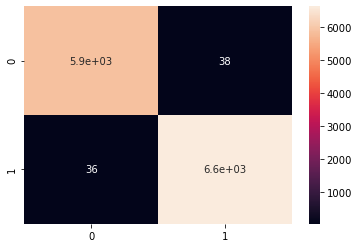

In [15]:
cm1=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm1)
cr1=classification_report(y_test, y_pred)
print("Classification Report:\n",cr1)
sns.heatmap(cm1, annot=True)

In [16]:
# import time

# def procedure():
#    time.sleep(2.5)

# # measure process time
# t0 = time.clock()
# procedure()
# print (time.clock())

# # measure wall time
# t0 = time.time()
# procedure()
# print (time.time() - t0)

# Multi-layer precission


In [17]:
%%time
mlp=MLPClassifier()
execution2=mlp.fit(x_train, y_train)
y_pred=mlp.predict(x_test)

Wall time: 1.95 s


In [18]:
nb=mlp.score(x_test,y_test)
m2=nb*100
print("Accuracy: ",m2)

Accuracy:  95.06986344871387


In [19]:
score2=accuracy_score(y_test, y_pred) * 100
print("Accuracy using multi-layer precission: ", round(score2, 1), "%" )

Accuracy using multi-layer precission:  95.1 %


In [20]:
error2=np.mean(y_pred != y_test) # error rate
error2

0.049301365512861225

Confusion Matrix:
 [[5574  353]
 [ 268 6401]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.95      0.94      0.95      5927
      normal       0.95      0.96      0.95      6669

    accuracy                           0.95     12596
   macro avg       0.95      0.95      0.95     12596
weighted avg       0.95      0.95      0.95     12596



<AxesSubplot:>

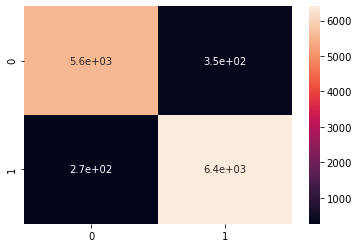

In [21]:
cm2=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm2)
cr2=classification_report(y_test, y_pred)
print("Classification Report:\n",cr2)
sns.heatmap(cm2, annot=True)

# Neural Network

In [22]:
%%time
nn=MLPClassifier()
execution3=nn.fit(x_train, y_train)
y_pred=nn.predict(x_test)

Wall time: 2.38 s


In [23]:
nb=nn.score(x_test,y_test)
m3=nb*100
print("Accuracy: ",m3)

Accuracy:  94.7602413464592


In [24]:
score3=accuracy_score(y_test, y_pred) * 100
print("Accuracy using neural network: ", round(score3, 1), "%" )

Accuracy using neural network:  94.8 %


In [25]:
error3=np.mean(y_pred != y_test) # error rate
error3

0.05239758653540807

Confusion Matrix:
 [[5619  308]
 [ 352 6317]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.94      0.95      0.94      5927
      normal       0.95      0.95      0.95      6669

    accuracy                           0.95     12596
   macro avg       0.95      0.95      0.95     12596
weighted avg       0.95      0.95      0.95     12596



<AxesSubplot:>

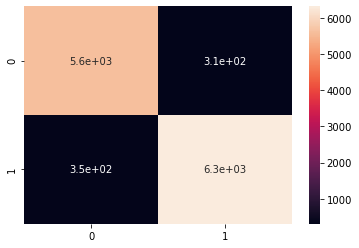

In [26]:
cm3=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm3)
cr3=classification_report(y_test, y_pred)
print("Classification Report:\n",cr3)
sns.heatmap(cm3, annot=True)

# Random Forest

In [27]:
%%time
rf=RandomForestClassifier()
execution4=rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

Wall time: 1.5 s


In [28]:
nb=rf.score(x_test,y_test)
m4=nb*100
print("Accuracy: ",m4)

Accuracy:  99.65862178469355


In [29]:
score4 = accuracy_score(y_test, y_pred) * 100
print("Accuracy using random forest: ", round(score4, 1), "%" )

Accuracy using random forest:  99.7 %


In [30]:
error4=np.mean(y_pred != y_test) # error rate
error4

0.003413782153064465

Confusion Matrix:
 [[5893   34]
 [   9 6660]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       1.00      0.99      1.00      5927
      normal       0.99      1.00      1.00      6669

    accuracy                           1.00     12596
   macro avg       1.00      1.00      1.00     12596
weighted avg       1.00      1.00      1.00     12596



<AxesSubplot:>

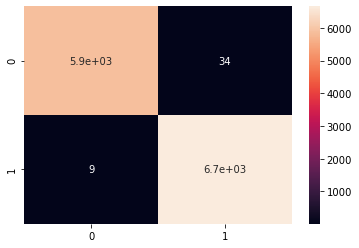

In [31]:
cm4= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm4)
cr4=classification_report(y_test, y_pred)
print("Classification Report:\n",cr4)
sns.heatmap(cm4, annot=True)

# K-Nearest Neighbors

In [32]:
%%time
knn=KNeighborsClassifier()
execution5=knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)

Wall time: 2.63 s


In [33]:
nb=knn.score(x_test,y_test)
m5=nb*100
print("Accuracy: ",m5)

Accuracy:  98.34868212130836


In [34]:
score5=accuracy_score(y_test, y_pred) * 100
print("Accuracy using kneighbours: ", round(score5, 1), "%" )

Accuracy using kneighbours:  98.3 %


In [35]:
error5=np.mean(y_pred != y_test) # error rate
error5

0.01651317878691648

Confusion Matrix:
 [[5815  112]
 [  96 6573]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.98      0.98      0.98      5927
      normal       0.98      0.99      0.98      6669

    accuracy                           0.98     12596
   macro avg       0.98      0.98      0.98     12596
weighted avg       0.98      0.98      0.98     12596



<AxesSubplot:>

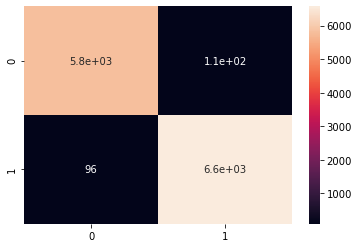

In [36]:
cm5=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm5)
cr5=classification_report(y_test, y_pred)
print("Classification Report:\n",cr5)
sns.heatmap(cm5, annot=True)

# Naive Bayes

In [37]:
%%time
nby=BernoulliNB()
execution6=nby.fit(x_train, y_train)
y_pred=nby.predict(x_test)

Wall time: 80.8 ms


In [38]:
nb=nby.score(x_test,y_test)
m6=nb*100
print("Accuracy: ",m6)

Accuracy:  89.52842172118133


In [39]:
score6=accuracy_score(y_test, y_pred) * 100
print("Accuracy using naive bayes: ", round(score6, 1), "%" )

Accuracy using naive bayes:  89.5 %


In [40]:
error6=np.mean(y_pred != y_test) # error rate
error6

0.10471578278818673

Confusion Matrix:
 [[5029  898]
 [ 421 6248]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.92      0.85      0.88      5927
      normal       0.87      0.94      0.90      6669

    accuracy                           0.90     12596
   macro avg       0.90      0.89      0.89     12596
weighted avg       0.90      0.90      0.89     12596



<AxesSubplot:>

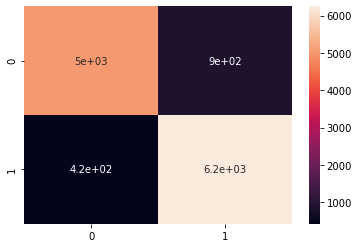

In [41]:
cm6=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm6)
cr6=classification_report(y_test, y_pred)
print("Classification Report:\n",cr6)
sns.heatmap(cm6, annot=True)

# Support vector machine

In [42]:
%%time
svm=SVC()
execution7=svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)

Wall time: 30.2 s


In [43]:
nb=svm.score(x_test,y_test)
m7=nb*100
print("Accuracy: ",m7)

Accuracy:  52.953318513813905


In [44]:
score7=accuracy_score(y_test, y_pred) * 100
print("Accuracy using support vector machine: ", round(score7, 1), "%" )

Accuracy using support vector machine:  53.0 %


In [45]:
error7=np.mean(y_pred != y_test) # error rate
error7

0.4704668148618609

Confusion Matrix:
 [[   4 5923]
 [   3 6666]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.57      0.00      0.00      5927
      normal       0.53      1.00      0.69      6669

    accuracy                           0.53     12596
   macro avg       0.55      0.50      0.35     12596
weighted avg       0.55      0.53      0.37     12596



<AxesSubplot:>

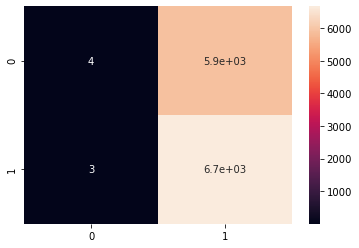

In [46]:
cm7=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm7)
cr7=classification_report(y_test, y_pred)
print("Classification Report:\n",cr7)
sns.heatmap(cm7, annot=True)

# Logistic regression

In [47]:
%%time
lr= LogisticRegression()
execution8=lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)

Wall time: 378 ms


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
nb=lr.score(x_test,y_test)
m8=nb*100
print("Accuracy: ",m8)

Accuracy:  87.62305493807558


In [49]:
score8=accuracy_score(y_test, y_pred) * 100
print("Accuracy using support vector machine: ", round(score8, 1), "%" )

Accuracy using support vector machine:  87.6 %


In [50]:
error8=np.mean(y_pred != y_test) # error rate
error8

0.1237694506192442

Confusion Matrix:
 [[5022  905]
 [ 654 6015]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.88      0.85      0.87      5927
      normal       0.87      0.90      0.89      6669

    accuracy                           0.88     12596
   macro avg       0.88      0.87      0.88     12596
weighted avg       0.88      0.88      0.88     12596



<AxesSubplot:>

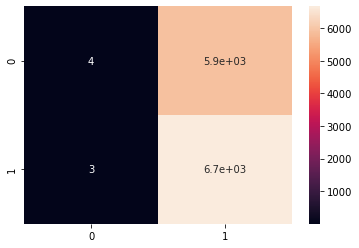

In [51]:
cm8=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm8)
cr8=classification_report(y_test, y_pred)
print("Classification Report:\n",cr8)
sns.heatmap(cm7, annot=True)

# finalize result


In [52]:
algorithms=["DT","MLP","NN","RF","KNN","NBY","SVM","LR"]
scores=[score1,score2,score3,score4,score5,score6,score7,score8]
errors=[error1,error2,error3,error4,error5,error6,error7,error8]
executions=[execution1,execution2,execution3,execution4,execution5,execution6,execution7,execution8]
# classifications=[cr1,cr2,cr3,cr4,cr5,cr6,cr7]

In [53]:
accuracy=pd.DataFrame(scores,algorithms)
accuracy.columns=['Accuracy']
error=pd.DataFrame(errors,algorithms)
error.columns=['Error']
execution=pd.DataFrame(executions,algorithms)
execution.columns=['Execution']

In [54]:
pd.concat([accuracy, error],axis=1)


,Accuracy,Error
DT,99.412512,0.005875
MLP,95.069863,0.049301
NN,94.760241,0.052398
RF,99.658622,0.003414
KNN,98.348682,0.016513
NBY,89.528422,0.104716
SVM,52.953319,0.470467
LR,87.623055,0.123769


In [60]:
execution

,Execution
DT,DecisionTreeClassifier()
MLP,MLPClassifier()
NN,MLPClassifier()
RF,"(DecisionTreeClassifier(max_features='auto', r..."
KNN,KNeighborsClassifier()
NBY,BernoulliNB()
SVM,SVC()
LR,LogisticRegression()


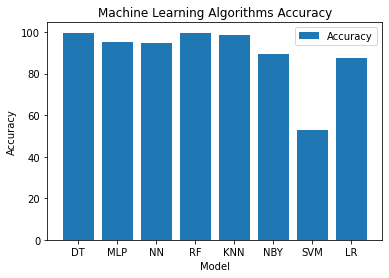

In [56]:
plt.bar(algorithms,scores, label="Accuracy")
plt.legend()
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Machine Learning Algorithms Accuracy')
plt.show()

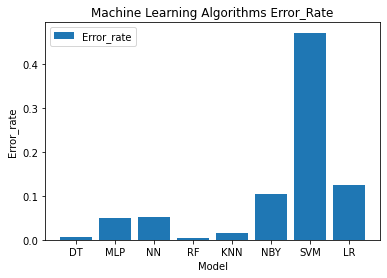

In [57]:
plt.bar(algorithms,errors, label="Error_rate")
plt.legend()
plt.xlabel('Model')
plt.ylabel('Error_rate')
plt.title('Machine Learning Algorithms Error_Rate')
plt.show()

In [58]:
# score_list = ["f1-score", "precision", "recall"]
cr1

'              precision    recall  f1-score   support\n\n     anomaly       0.99      0.99      0.99      5927\n      normal       0.99      0.99      0.99      6669\n\n    accuracy                           0.99     12596\n   macro avg       0.99      0.99      0.99     12596\nweighted avg       0.99      0.99      0.99     12596\n'